In [105]:
import pandas as pd
import numpy as np

In [128]:
data = pd.read_json('sample.json')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Columns: 111 entries, grace_period to mmtc_out_am
dtypes: float64(78), int64(33)
memory usage: 115.5 KB


In [129]:
data = data.fillna(0)

In [130]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

In [131]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 100):
  kmeans = KMeans(k, random_state=0, n_init=10)
  kmeans.fit(data_scaled)
  inertia.append(kmeans.inertia_)

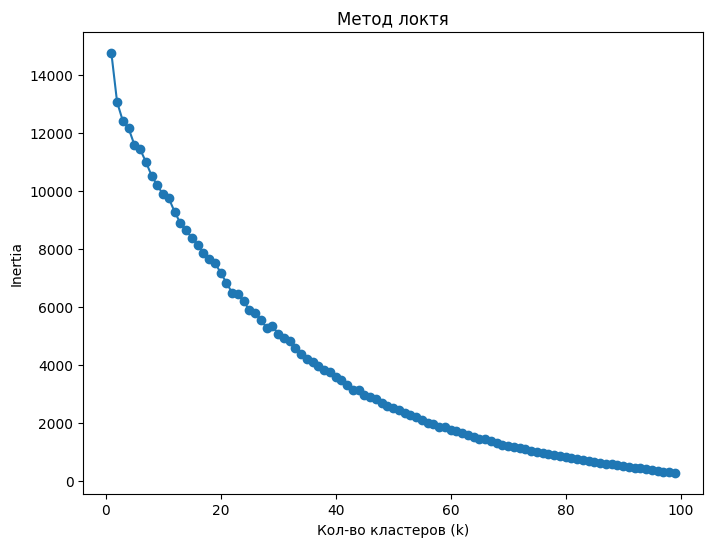

In [132]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(range(1, 100), inertia, marker='o')
plt.title('Метод локтя')
plt.xlabel('Кол-во кластеров (k)')
plt.ylabel('Inertia')
plt.show()

In [133]:
kmeans = KMeans(n_clusters=40, random_state=0, n_init='auto')
data_scaled['cluster'] = kmeans.fit_predict(data_scaled)

In [142]:
def get_cluster_indices_simplified(data_scaled):
    """
    Возвращает словарь, где ключи - номера кластеров (отсортированные по возрастанию),
    а значения - списки индексов строк data_scaled,
    которые попали в этот кластер.

    Args:
        data_scaled: DataFrame с МАСШТАБИРОВАННЫМИ данными и столбцом 'cluster'.

    Returns:
        dict: Словарь с индексами строк для каждого кластера.
    """
    cluster_indices = {}
    for cluster_num in sorted(data_scaled['cluster'].unique()):  #  Используем .unique() и sorted()
        indices = data_scaled.index[data_scaled['cluster'] == cluster_num].tolist() # Сразу преобразуем в список
        cluster_indices[cluster_num] = indices
    return cluster_indices

In [143]:
cluster_indices = get_cluster_indices_simplified(data_scaled)

# --- Вывод результатов ---
for cluster_num, indices in cluster_indices.items():
    print(f"Кластер {cluster_num}:")
    print(indices)
    print("-" * 20)

Кластер 0:
[72]
--------------------
Кластер 1:
[12, 19, 26, 29, 37, 41, 46, 64, 71, 76, 84, 101]
--------------------
Кластер 2:
[57]
--------------------
Кластер 3:
[10, 44, 48, 54, 59, 87, 99, 120, 123, 132]
--------------------
Кластер 4:
[4, 86, 104]
--------------------
Кластер 5:
[93]
--------------------
Кластер 6:
[22]
--------------------
Кластер 7:
[81]
--------------------
Кластер 8:
[9, 16, 21, 58, 82]
--------------------
Кластер 9:
[5, 11, 23, 31, 33, 36, 51, 90, 91, 92, 95, 106, 111, 119, 121]
--------------------
Кластер 10:
[8, 30, 128]
--------------------
Кластер 11:
[28]
--------------------
Кластер 12:
[1, 17, 20, 32, 53, 62, 63, 70, 78, 88, 89, 105, 122]
--------------------
Кластер 13:
[49]
--------------------
Кластер 14:
[114]
--------------------
Кластер 15:
[18, 24, 35, 50, 55, 61, 68, 73, 75, 97, 107]
--------------------
Кластер 16:
[42]
--------------------
Кластер 17:
[77, 96]
--------------------
Кластер 18:
[45]
--------------------
Кластер 19:
[94]
--

In [144]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

silhouette_avg = silhouette_score(data_scaled, kmeans.labels_)
print(f"Средний коэффициент силуэта: {silhouette_avg}")

ch_score = calinski_harabasz_score(data_scaled, kmeans.labels_)
print(f"Индекс Калински-Харабаса: {ch_score}")

Средний коэффициент силуэта: 0.22053527046496477
Индекс Калински-Харабаса: 15.425597054872593


In [145]:
# Пример определния кластера для рандомного вектора
num_features = data_scaled.shape[1] - 1
random_vector = np.random.rand(num_features)
random_vector_scaled = scaler.transform(random_vector.reshape(1, -1))
predicted_cluster = kmeans.predict(random_vector_scaled)[0]
print(f"Предсказанный кластер: {predicted_cluster}")

Предсказанный кластер: 20


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
